## European Medicine Agency (EMA)

The European Medicines Agency (EMA) is a decentralized agency of the European Union (EU) responsible for the scientific evaluation, supervision, and safety monitoring of medicines in the EU. EMA plays a crucial role in the public health domain by ensuring that all medicines available on the EU market are safe, effective, and of high quality.

## Summary of product characteristics (SmPC)

A document describing the properties and the officially approved conditions of use of a medicine. Summaries of product characteristics form the basis of information for healthcare professionals on how to use the medicine safely and effectively. Abbreviated as SmPC. 

<br/>

### Structure of an SmPC
The structure of the SmPC is defined by the European pharmaceutical legislation. The information included in the SmPC should be product specific and can be cross-referenced to avoid any redundancy. It should be documented in a clear language and should not lead to any ambiguity. The SmPC is divided into 6 major sections:

1. Name of the product
2. Composition
3. Pharmaceutical Form
4. Clinical particulars – Includes therapeutic indications, recommendation for dosages and safety information
5. Pharmacological properties – Takes into account the therapeutic indications of the clinical elements and their potential adverse drug reactions
6. Pharmaceutical particulars – Includes Regulatory information related to the drug

<br/>

<img src="./images/structureSmPC.png" width="600px;">

<br/>
<br/>

### Prescribing medicines for special populations
When prescribing medication to specific groups like children, the elderly, pregnant and breastfeeding women, and individuals with kidney or liver issues, it's
crucial to exercise caution. The public documentation for medicines, especially the Summary of Product Characteristics (SmPC) and the package leaflets (PLs), often includes many of these essential precautions.
<br/>

<img src="./images/SmPC_authorization_process.png" width="800px;">

When seeking marketing authorization, a company submits an application dossier that contains instructions for healthcare professionals on the safe and effective use of the medicine. In Europe, this is referred to as the Summary of Product Characteristics (SmPC). The SmPC must be regularly updated over the medicine's lifecycle to reflect new data on efficacy or safety. The figure above illustrates the connection between a medicine's development, the regulatory dossier with the initial proposed SmPC, the SmPC that gets approved, and subsequent updates to the SmPC.


[1]: https://www.ema.europa.eu/en/glossary/summary-product-characteristics
[2]: https://www.freyrsolutions.com/what-is-an-smpc


### Project Overview

Using natural language processing (NLP) techniquesto automatically extract adverse drug reactions from such unstructured textual information helps clinicalexperts to effectively and efficiently use them in daily practices. Such techniques have been developed for Structured Product Labels from the Food and Drug Administration (FDA), but there is no researchfocusing on extracting from the Summary of Product Characteristics.


In this work, we built a naturallanguage processing pipeline that automatically scrapes the summary of product characteristics onlineand then extracts adverse drug reactions from them.

<img src="./images/Project_Overview.png" width="300px;">

In [ ]:
!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline


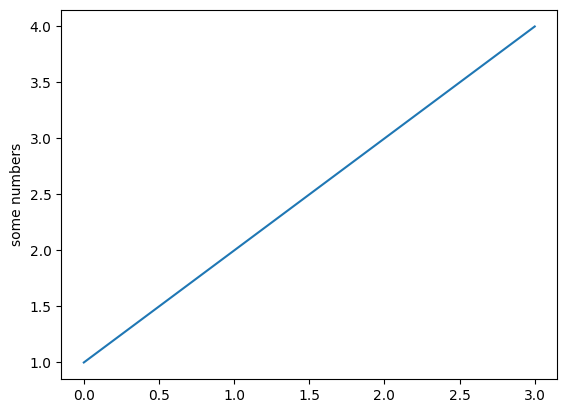

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()


In [7]:
from collections.abc import MutableMapping

##  STEP 1: Download medicine data and import them to Database
You can download the European Medicines Agency's (EMA) medicine-related data published on this website in Excel table format from this page. EMA updates these medicine data tables once a day. The following two files need to be downloaded:

<br/>

* The file listing all medicines, **including the withdrawn and not authorised ones**, named medicines_output_european_public_assessment_reports_en.xlsx, found [here](https://www.ema.europa.eu/sites/default/files/Medicines_output_european_public_assessment_reports.xlsx)

and

* The file listing **all the URLs for the SmPCs**, named Product information URLs for member product-information-urls-member-states_en.xls, found [here](https://www.ema.europa.eu/documents/product-information/product-information-urls-member-states_en.xls)


##### Disclaimer
The database is used purely to join the two csv. The view can also be done with dataframes without the need to use the database

[3]: https://toolbox.eupati.eu/resources/prescribing-medicines-for-special-populations/?print=print
[4]: https://www.ema.europa.eu/en/homepage


In [3]:
import os
import pandas as pd
import re
import sqlite3
import camelot

# Define the folder that you store the required xls
PATH = "./data"

MEDICINE_LIST = "medicines_output_european_public_assessment_reports_en.xlsx"
PRODUCT_URLS_LIST = "product-information-urls-member-states_en.xls"

In [6]:
medicinesOutputData = pd.read_excel(os.path.join(PATH, MEDICINE_LIST))
medicinesOutputData.head()

,Category,Medicine name,Therapeutic area,International non-proprietary name (INN) / common name,Active substance,Product number,Patient safety,Authorisation status,ATC code,Additional monitoring,...,Vet pharmacotherapeutic group,Date of opinion,Decision date,Revision number,Condition / indication,Species,ATCvet code,First published,Revision date,URL
0,Human,Ryeqo,Leiomyoma,"relugolix, estradiol, norethisterone acetate","Relugolix, norethisterone acetate, estradiol h...",EMEA/H/C/005267,no,Authorised,H01CC54,yes,...,NaN,2021-07-16 00:00:00,2023-10-30 01:00:00,6.0,Ryeqo is indicated in adult women of reproduct...,NaN,NaN,2021-05-19 14:14:00,2023-12-04 18:41:00,https://www.ema.europa.eu/en/medicines/human/E...
1,Human,Yesafili,Macular Edema; Retinal Vein Occlusion; Diabe...,aflibercept,aflibercept,EMEA/H/C/006022,no,Authorised,S01LA05,yes,...,NaN,2023-07-20 00:00:00,2023-11-29 01:00:00,1.0,Yesafili is indicated for adults for the treat...,NaN,NaN,2023-07-17 16:27:00,2023-12-04 18:15:00,https://www.ema.europa.eu/en/medicines/human/E...
2,Human,Leflunomide medac,"Arthritis, Rheumatoid",leflunomide,leflunomide,EMEA/H/C/001227,no,Authorised,L04AA13,no,...,NaN,NaT,2023-10-31 01:00:00,19.0,Leflunomide is indicated for the treatment of ...,NaN,NaN,2018-01-30 14:10:00,2023-12-04 17:56:00,https://www.ema.europa.eu/en/medicines/human/E...
3,Human,Filgrastim Hexal,Neutropenia; Hematopoietic Stem Cell Transpla...,filgrastim,filgrastim,EMEA/H/C/000918,no,Authorised,L03AA02,no,...,NaN,NaT,2023-11-30 01:00:00,24.0,Reduction in the duration of neutropenia and t...,NaN,NaN,2018-05-24 17:15:00,2023-12-04 17:43:00,https://www.ema.europa.eu/en/medicines/human/E...
4,Human,Opzelura,Vitiligo,ruxolitinib,ruxolitinib phosphate,EMEA/H/C/005843,no,Authorised,D11AH,no,...,NaN,2023-02-23 01:00:00,2023-10-19 00:00:00,2.0,Opzelura is indicated for the treatment of non...,NaN,NaN,2023-02-22 15:05:00,2023-12-04 17:35:00,https://www.ema.europa.eu/en/medicines/human/E...


In [7]:
productInformationURLs = pd.read_excel(os.path.join(PATH, PRODUCT_URLS_LIST))
productInformationURLs.head()

,ProductName,ProductNumber,Domain,LanguageCode,URL(oldwebsite),URL(currentwebsite)
0,Abasaglar (previouslyAbasria),EMEA/H/C/002835,human,en,http://www.ema.europa.eu/docs/en_GB/document_l...,https://www.ema.europa.eu/en/documents/product...
1,Abecma,EMEA/H/C/004662,human,en,NaN,https://www.ema.europa.eu/en/documents/product...
2,Abevmy,EMEA/H/C/005327,human,en,NaN,https://www.ema.europa.eu/en/documents/product...
3,Abilify,EMEA/H/C/000471,human,en,http://www.ema.europa.eu/docs/en_GB/document_l...,https://www.ema.europa.eu/en/documents/product...
4,Abilify Maintena,EMEA/H/C/002755,human,en,http://www.ema.europa.eu/docs/en_GB/document_l...,https://www.ema.europa.eu/en/documents/product...


In [8]:
conn = sqlite3.connect(os.path.join(PATH, "SmPCs.db"))

medicinesOutputData.to_sql('emaMedicinesOP', conn, if_exists='replace', index=False)
productInformationURLs.to_sql('emaProductInformationURLs', conn, if_exists='replace', index=False)

1928

## Step 2: Create csv with SmPCs URLs

 The actual SmPCs information will be extracted from the joinedHumanAuthorisedProductURLsONLY.csv file which contains the URLs for the authorised medicines for human use.

In [9]:
joinedHumanAuthorisedProductURLsONLY = pd.read_sql("""
    SELECT [URL(currentwebsite)]
    FROM emaMedicinesOP
    LEFT JOIN emaProductInformationURLs 
    ON emaMedicinesOP.[Medicine name]=emaProductInformationURLs.[ProductName]
    WHERE  emaMedicinesOP.Category='Human'
      AND emaMedicinesOP.[Authorisation Status] ='Authorised';
""", conn)

joinedHumanAuthorisedProductURLsONLY.to_csv(os.path.join(PATH, "joinedHumanAuthorisedProductURLsONLY.csv"))

## Step 3: Download SmPCs pdfs


In [10]:
import requests

In [ ]:
urlsDF = pd.read_csv(os.path.join(PATH, "joinedHumanAuthorisedProductURLsONLY.csv"))
urlsDF.dropna(inplace = True)
urls = urlsDF['URL(currentwebsite)'].tolist()

In [ ]:
for index, url in enumerate(urls):
    response = requests.get(url)
    file_name = url.split('/')[-1]

    print("Download ", index, " with name: ", file_name)

    if response.status_code == 200:
        with open(os.path.join(PATH, "pdfs", file_name), 'wb') as pdf_file:
            pdf_file.write(response.content)
    else:
        print(f"Failed to download the : {file_name}")

### Step 4: Extract Tabulated Summary of Adverse Reactions from the 4.8 section 

This section should include all adverse reactions for which, after thorough assessment, a causal relationship between the medicinal product and the adverse event is at least a reasonable possibility. These ADRs should be all reactions from:
* Clinical trials
* Post-authorisation safety studies
* Spontaneous reporting

#####  The tabulated list of adverse reactions in section 4.8:
* Introduce table with short paragraph stating source of safety database
* Separate tables are acceptable in exceptional cases where adverse profiles markedly differ depending on the use of the product.

#####  Structure of the table: general considerations

* Table should be written according to MedDRA system organ classification (SOC)
* A pragmatic approach to the location of terms should be taken in order to make the identification of adverse reactions simpler and clinically appropriate for the reader
* Within each SOC, adverse reactions should be ranked under headings of frequency, most frequent reactions first
* Frequency grouping, adverse reactions should be presented in order of decreasing seriousness

##### Frequency Grouping:
* Very common (≥1/10)
* Common (≥1/100 to <1/10)
* Uncommon (≥1/1,000 to <1/100)
* Rare (≥1/10,000 to <1/1,000)
* Very rare (<1/10,000)
* Frequency not known (cannot be estimated from the available data)

#### SmPCs Examples

<img src="./images/SmPCs_example.png" width="500px;">


## MedDRA
MedDRA is a multilingual terminology allowing most users to operate in their native languages. The table below identifies the initial MedDRA version when each MedDRA language was made available to users. 

<br />

<img src="./images/MedDRA_Hierarchy.png" width="500px;">

<br />

The most important reason to “code” data into a standardised terminology is to analyse it. A key benefit of MedDRA is in its support of straightforward as well as sophisticated analyses. MedDRA can be used to analyse individual medical events (e.g., “Influenza”) or issues involving a system, organ or aetiology (e.g., infections) using its hierarchical structure. MedDRA can be used for signal detection and monitoring of clinical syndromes whose symptoms encompass numerous systems or organs using its multiaxial hierarchy or through the special feature of Standardised MedDRA Queries.

<br />

### MedDRA Hierarchy

The structure of MedDRA is very logical. There are five levels to the MedDRA hierarchy, arranged from very specific to very general.

<br />

Download [MedDRA codes](https://www.ema.europa.eu/en/documents/other/meddra-important-medical-event-terms-list-version-261_en.xlsx) and extract the unique values from the SOC Name column

In [13]:
medraSOC = pd.read_excel(os.path.join(PATH, "MedDRA", "meddra-important-medical-event-terms-list-version-261_en.xlsx"))
socList = medraSOC['SOC Name'].unique()
SOCListRegex = '(?:% s)' % '|'.join(socList)
regex = re.compile(SOCListRegex)

In [14]:
regex

re.compile(r'(?:Blood and lymphatic system disorders|Cardiac disorders|Congenital, familial and genetic disorders|Endocrine disorders|Eye disorders|Gastrointestinal disorders|Hepatobiliary disorders|Immune system disorders|Infections and infestations|Injury, poisoning and procedural complications|Investigations|Musculoskeletal and connective tissue disorders|Neoplasms benign, malignant and unspecified (incl cysts and polyps)|Nervous system disorders|Pregnancy, puerperium and perinatal conditions|Renal and urinary disorders|Reproductive system and breast disorders|Respiratory, thoracic and mediastinal disorders|Surgical and medical procedures|Vascular disorders|Ear and labyrinth disorders|General disorders and administration site conditions|Metabolism and nutrition disorders|Product issues|Psychiatric disorders|Skin and subcutaneous tissue disorders|Social circumstances)',
           re.UNICODE)

### Custom function: extract_table_rows

This Python function is designed to process a DataFrame and identify-extract information based on columns' name.

In [15]:
def extract_table_rows(df):
    rows = []

    for row in df.itertuples():
        # First row contains the header
        if row[0] == 0:
            # Find the order of columns
            if "reaction".lower() in row[2].lower():
                AD_index, F_index  = 2, 3
            else:
                AD_index, F_index  = 3, 2

        else:
            ad_reaction = row[AD_index].split('\n')
            freq = row[F_index].split('\n')
            
            for index, ad in enumerate(ad_reaction):
                ad_row = []
                ad_row.insert(0, row[1].replace('\n', ''))  
                ad_row.insert(1, ad_reaction[index].strip())
                ad_row.insert(2, freq[index].strip())
                rows.append(ad_row)
    return rows

In [16]:
# List all pdfs in the directory
pdfs_processed = []
pdfs_not_processed = []

for file in os.listdir(os.path.join(PATH, 'pdfs')): # ['abecma-epar-product-information_en.pdf']:
    
    if file.lower().endswith('.pdf'):
        filename = file.split('/')[-1].split('-')[0]
        fullpath = os.path.join(PATH, 'pdfs', file)
        
        print("Start Processing Filename: ", fullpath)
        
        tables = camelot.read_pdf(fullpath, pages='all', flavor='lattice', line_scale=80, shift_text = ['', 'l'], process_background=False)

        rows = []
        for i, table in enumerate(tables):
            # Convert table to a pandas DataFrame
            df = table.df
    
            # Search for regex in the first column
            matches = df[0].str.contains(regex, regex=True)
    
            # Check if any value in the column matches the regex pattern
            contains_regex = matches.any()

            if contains_regex:
                if len(df.columns) == 3:
                    # Case A: Dataframe consists of 3 columns
                    print("The file ", filename, " does have three columns table")
                    extracted_rows = extract_table_rows(df)
                    for row in extracted_rows:
                        rows.append(row)

                    pdfs_processed.append(fullpath)
                else:
                    print("The file ", filename, " does NOT have three columns table")
                    pdfs_not_processed.append(fullpath)
        if rows:
            pd.DataFrame(rows, columns=["SOC", "ADR", "FREQ"]).to_csv(os.path.join(PATH, "extracted_tables", filename + ".csv"), sep=';', encoding='utf-8', index=False)
            
# Create report
pd.DataFrame([pdfs_processed, pdfs_not_processed], columns=["Processed", "Not Processed"]).to_csv(os.path.join(PATH, "report.csv"), sep=';', encoding='utf-8', index=False)

Start Processing Filename:  ./data/pdfs/odomzo-epar-product-information_en.pdf


/var/folders/h3/2hsc1tt90kn6k_0wsgjj18nc0000gn/T/ipykernel_3641/3477414072.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matches = df[0].str.contains(regex, regex=True)


The file  odomzo  does NOT have three columns table
Start Processing Filename:  ./data/pdfs/metformin-hydrochloride-accord-epar-product-information_en.pdf


/var/folders/h3/2hsc1tt90kn6k_0wsgjj18nc0000gn/T/ipykernel_3641/3477414072.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matches = df[0].str.contains(regex, regex=True)


The file  metformin  does NOT have three columns table
The file  metformin  does NOT have three columns table
Start Processing Filename:  ./data/pdfs/prehevbri-epar-product-information_en.pdf
The file  prehevbri  does have three columns table


/var/folders/h3/2hsc1tt90kn6k_0wsgjj18nc0000gn/T/ipykernel_3641/3477414072.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matches = df[0].str.contains(regex, regex=True)


IndexError: list index out of range

## Testing

In [26]:
file = "./data/pdfs/abecma-epar-product-information_en.pdf"

In [27]:
tables = camelot.read_pdf(file, pages='all', flavor='lattice', line_scale=40, shift_text = ['', 'l'], process_background=False)

In [16]:
for i, table in enumerate(tables):
    df = table.df
    
    # Search for regex in the first column
    matches = df[0].str.contains(regex, regex=True)
    
    # Check if any value in the column matches the regex pattern
    contains_regex = matches.any()

    if contains_regex:
        if len(df.columns) == 3:
            print("Table index: ", i)

Table index:  0


/var/folders/h3/2hsc1tt90kn6k_0wsgjj18nc0000gn/T/ipykernel_35975/2842267533.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matches = df[0].str.contains(regex, regex=True)


In [17]:
tables[0].df.head()

,0,1,2
0,System Organ Class,Adverse Reaction,Frequency
1,Blood and Lymphatic System \nDisorders,Lymphadenopathy,Uncommon
2,,"Diarrhoea1, nausea/vomiting1",Common
3,Gastrointestinal Disorders,Abdominal pain,Common
4,,"Injection site pain1, injection site tendernes...",Very Common


In [18]:
df = tables[0].df

In [19]:
rows = []

for row in df.itertuples():
    print("Row: ", row)
    # First row contains the header
    if row[0] == 0:
        # Find the order of columns
        print("Header")
        if "reaction".lower() in row[2].lower():
            AD_index, F_index  = 2, 3
        else:
            AD_index, F_index  = 3, 2

    else:
        ad_reaction = row[AD_index].split('\n')
        freq = row[F_index].split('\n')
        
        for index, ad in enumerate(ad_reaction):
            ad_row = []
            ad_row.insert(0, row[1].replace('\n', ''))  
            ad_row.insert(1, ad_reaction[index].strip())
            ad_row.insert(2, freq[index].strip())
            rows.append(ad_row)
rows

Row:  Pandas(Index=0, _1='System Organ Class', _2='Adverse Reaction', _3='Frequency')
Header
Row:  Pandas(Index=1, _1='Blood and Lymphatic System \nDisorders', _2='Lymphadenopathy', _3='Uncommon')
Row:  Pandas(Index=2, _1='', _2='Diarrhoea1, nausea/vomiting1', _3='Common')
Row:  Pandas(Index=3, _1='Gastrointestinal Disorders', _2='Abdominal pain', _3='Common')
Row:  Pandas(Index=4, _1='', _2='Injection site pain1, injection site tenderness1, \ninjection site pruritus1, fatigue1,', _3='Very Common')


IndexError: list index out of range

In [22]:
os.path.join(PATH, 'pdfs', 'abecma-epar-product-information_en.pdf')

'./data/pdfs/abecma-epar-product-information_en.pdf'

## Explore Camelot 

fine-tuning the table extraction process in Camelot is crucial for dealing with complex or poorly formatted tables in PDFs. Here are some detailed tips and techniques for fine-tuning your table extractions.

### 1. Selecting the Right Flavor

Camelot offers two flavors for table extraction: lattice and stream.

* **Lattice** is used for PDFs with tables that have clear grid lines.
* **Stream** is for PDFs where tables are defined by whitespace between columns.

In [ ]:
tables = camelot.read_pdf('path_to_your_pdf.pdf', flavor='lattice') # or flavor='stream'

### 2. Adjusting Table Areas

Sometimes, Camelot may not correctly identify the area where a table is located. You can manually specify the table area:

**Specify Table Area**: Use the table_areas parameter to define the area where the table is located in the PDF. The coordinates are in the format **[x1, y1, x2, y2]**, where **(x1, y1)** is the top-left corner, and **(x2, y2)** is the bottom-right corner of the table.

In [ ]:
tables = camelot.read_pdf('your_pdf.pdf', flavor='stream', table_areas=['x1,y1,x2,y2'])

### 3. Tweaking Column Separation

For the **stream flavor**, you can define how columns are separated:

**Column Separation**: Use columns parameter to specify the x-coordinates of column boundaries.

In [ ]:
tables = camelot.read_pdf('your_pdf.pdf', flavor='stream', columns=['x1', 'x2', 'x3'])

### 4. Adjusting Row Tolerances and Column Tolerances

These parameters help in fine-tuning the table extraction in the **lattice flavor**:

* **Row Tolerance**: row_tol sets the tolerance for merging cells vertically.
* **Column Tolerance**: column_tol sets the tolerance for merging cells horizontally.

In [ ]:
tables = camelot.read_pdf('your_pdf.pdf', flavor='lattice', row_tol=10, column_tol=10)

### 5. Using Edge Tolerance

When using the **lattice flavor**, **edge_tol** helps if the table lines are not detected accurately.

In [ ]:
tables = camelot.read_pdf('your_pdf.pdf', flavor='lattice', edge_tol=500)

### 6. Splitting Text

If you have text that spans across multiple cells or rows, you might need to adjust the text splitting:

**Split Text**: Use **split_text** to split text that spans across multiple cells.

In [ ]:
tables = camelot.read_pdf('your_pdf.pdf', split_text=True)

### 7. Flagging Suspect Content

Camelot allows you to flag cells with content that might have been parsed incorrectly:

**Flag Suspect**: Set **flag_size** to flag cells with text smaller than the specified font size.

In [ ]:
tables = camelot.read_pdf('your_pdf.pdf', flag_size=True)

### 8. Customizing Parsing Strategy

In some cases, you might need to customize how Camelot parses each table:

**Strip Text**: Use **strip_text** to remove unwanted whitespace from text in cells.

In [ ]:
tables = camelot.read_pdf('your_pdf.pdf', strip_text=' \n')

**Line Scale**: In **lattice mode**, **line_scale** is important for detecting short lines. It's a factor by which the minimum line size is multiplied.

### 10. Debugging with Visualization

Camelot provides a way to visualize the table areas and grid lines, which can be very helpful for debuggin

**Plotting Tables**: Use **camelot.plot** to visualize the detected tables, text, and grid lines. This can help you adjust your parameters more accurately.

In [1]:
camelot.plot(tables[2], kind='grid').show()

NameError: name 'camelot' is not defined

/var/folders/h3/2hsc1tt90kn6k_0wsgjj18nc0000gn/T/ipykernel_3641/3259206825.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='text').show()


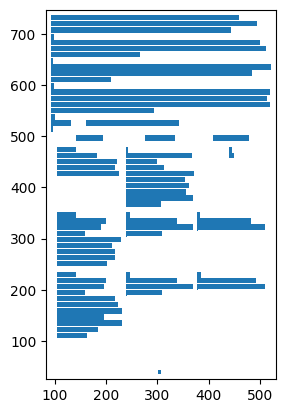

In [29]:
camelot.plot(tables[0], kind='text').show()

/var/folders/h3/2hsc1tt90kn6k_0wsgjj18nc0000gn/T/ipykernel_3641/1097681807.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[3], kind='contour').show()


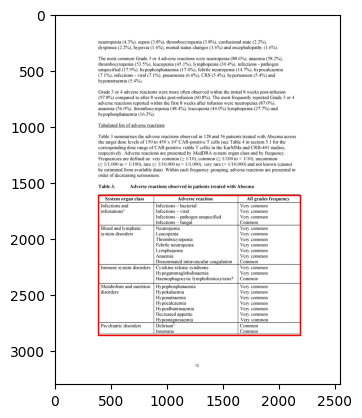

In [32]:
camelot.plot(tables[3], kind='contour').show()

/var/folders/h3/2hsc1tt90kn6k_0wsgjj18nc0000gn/T/ipykernel_3641/3497607042.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[3], kind='line').show()


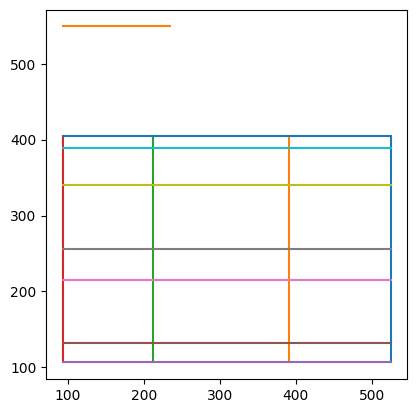

In [33]:
camelot.plot(tables[3], kind='line').show()

/var/folders/h3/2hsc1tt90kn6k_0wsgjj18nc0000gn/T/ipykernel_3641/2211539764.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[3], kind='joint').show()


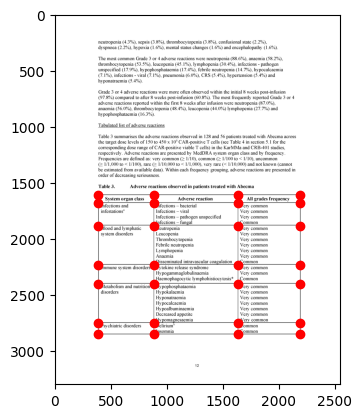

In [34]:
camelot.plot(tables[3], kind='joint').show()

In [27]:
!excalibur webserver

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/bin/excalibur", line 5, in <module>
    from excalibur.cli import cli
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/excalibur/cli.py", line 7, in <module>
    from . import __version__, settings
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/excalibur/settings.py", line 10, in <module>
    from . import configuration as conf
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/excalibur/configuration.py", line 7, in <module>
    from backports.configparser import ConfigParser
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/backports/configparser/__init__.py", line 130, in <module>
    from collections import MutableMapping
ImportError: cannot import name 'MutableMapping' from 'collections' (/Library/Frameworks/Python.framework/Versions/3.

In [29]:
tabl = camelot.read_pdf('metformin-hydrochloride-accord-epar-product-information_en.pdf', process_background=True)

FileNotFoundError: [Errno 2] No such file or directory: 'metformin-hydrochloride-accord-epar-product-information_en.pdf'